In [1]:
import sys
sys.path.insert(0, "./src/")

from test import test

# 02 - Evaluation trained models

## 02.1 Evaluate trained models

### Summary 

Robust accuracy is evaluated using an adversary with $\epsilon=0.5$, $\alpha=0.1$ and $\textrm{steps}=7$.

<table>
<center>
  <tr>
    <td></td>
    <td colspan="2"><b>Ilyas et al.</b></td>
    <td colspan="2"><b>This Work</b></td>
  </tr>
  <tr>
    <td><b>Training Method</b></td>
    <td><b>Standard Test Acc. (%)</b></td>
    <td><b>Robust Test Acc. (%)</b></td>
    <td><b>Standard Test Acc. (%)</b></td>
    <td><b>Robust Test Acc. (%)</b></td>
  </tr>
  <tr>
    <td>Standard Train on D</td>
    <td>95.25</td>
    <td>0.0</td>
    <td>82.41</td>
    <td>15.14</td>
  </tr>
  <tr>
    <td>Robust Train on D</td>
    <td>90.83</td>
    <td>70.90</td>
    <td>76.37</td>
    <td>51.27</td>
  </tr>
  <tr>
    <td>Standard Train on Dr</td>
    <td>85.40</td>
    <td>21.85</td>
    <td>69.41</td>
    <td>24.43</td>
  </tr>
  <tr>
    <td>Standard Train on Dnr</td>
    <td>87.68</td>
    <td>0.0</td>
    <td>67.11</td>
    <td>0.88</td>
  </tr>
  <tr>
    <td>Standard Train on Ddet (using standard model)</td>
    <td>43.7</td>
    <td>-</td>
    <td>33.1</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Standard Train on Drand (using standard model)</td>
    <td>63.3</td>
    <td>-</td>
    <td>40.1</td>
    <td>-</td>
  </tr>
    <tr>
  <td>Standard Train on Ddet (using robust model)</td>
    <td>5.8</td>
    <td>-</td>
    <td>46.0</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Standard Train on Drand (using robust model)</td>
    <td>25.2</td>
    <td>-</td>
    <td>46.0</td>
    <td>-</td>
  </tr>
</center>
</table>

In [2]:
v = "v7"

### Evaluate standard model

In [3]:
test(f"standard_d_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.8241
Adversarial test accuracy: 0.1514


Assure that adversarial performance against a stronger adversary is worse.

In [4]:
test(f"standard_d_{v}/best.pt", adversary_steps=10, adversary_epsilon=0.8)

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.8241
Adversarial test accuracy: 0.0353


### Evaluate robust model

In [5]:
test(f"robust_d_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.7637
Adversarial test accuracy: 0.5127


In [6]:
test(f"robust_d_{v}/best.pt", adversary_steps=10, adversary_epsilon=0.8)

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.7637
Adversarial test accuracy: 0.362


### Evaluate models trained on Dr & Dnr

Note the improved adversarial accuracy althought only standard training was performed.

In [7]:
test(f"standard_dr_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.6941
Adversarial test accuracy: 0.2443


In constrast, standard training on Dnr yields no adversarial accuracy at all.

In [8]:
test(f"standard_dnr_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.6711
Adversarial test accuracy: 0.0088


### Evaluate models trained on Ddet & Drand

Note the non-trivial standard accuracy that is achieved by training only on non-robust features.

In [9]:
test(f"standard_ddet_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.331
Adversarial test accuracy: 0.0003


In [10]:
test(f"standard_drand_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.401
Adversarial test accuracy: 0.0011


As sanity check, observe that when using data, that was extracted by finding non-robust features from the robust model, such non-trivial accuracy cannot be attained.

In [11]:
test(f"standard_drand_robust_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.4616
Adversarial test accuracy: 0.0234


In [12]:
test(f"standard_ddet_robust_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.4656
Adversarial test accuracy: 0.0312


## 02.2 Evaluate modified data

In [13]:
import glob
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

As for Ilyas et al., the $\mathcal{D_{NR}}$ images tend to resemble more the source image than the target image.

deer


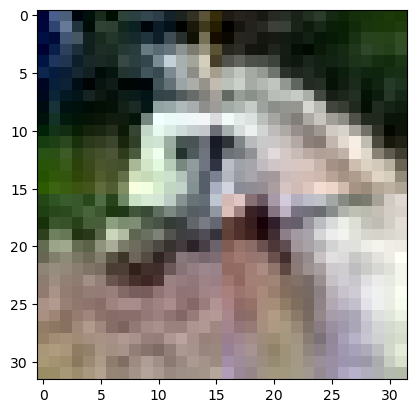

In [14]:
data_path = "./data/d_nr/"
with open(os.path.join(data_path, "labels.pkl"), "rb") as file:
    labels = pickle.load(file)
imgs = glob.glob(os.path.join(data_path, "img", "*.jpg"))
rand_idx = np.random.randint(low=0, high=len(imgs)-1)
img = np.array(Image.open(imgs[rand_idx]))

plt.imshow(img)
print(f"{classes[labels[rand_idx]]}")

ship


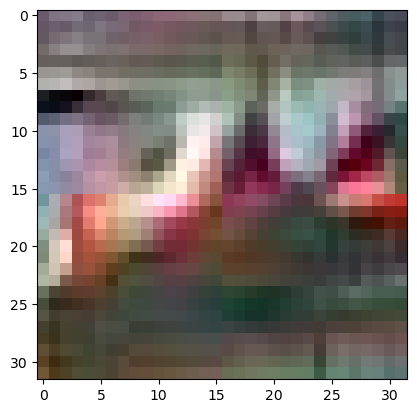

In [15]:
data_path = "./data/d_r/"
with open(os.path.join(data_path, "labels.pkl"), "rb") as file:
    labels = pickle.load(file)
imgs = glob.glob(os.path.join(data_path, "img", "*.jpg"))
rand_idx = np.random.randint(low=0, high=len(imgs)-1)
img = np.array(Image.open(imgs[rand_idx]))

plt.imshow(img)
print(f"{classes[labels[rand_idx]]}")

car


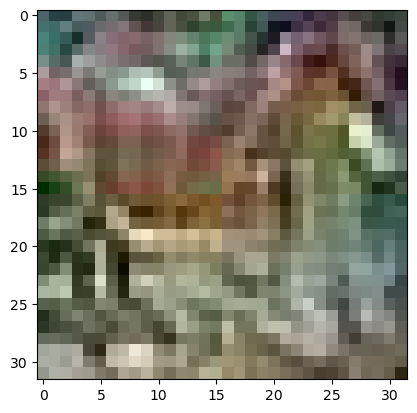

In [16]:
data_path = "./data/d_det/"
with open(os.path.join(data_path, "labels.pkl"), "rb") as file:
    labels = pickle.load(file)
imgs = glob.glob(os.path.join(data_path, "img", "*.jpg"))
rand_idx = np.random.randint(low=0, high=len(imgs)-1)
img = np.array(Image.open(imgs[rand_idx]))

plt.imshow(img)
print(f"{classes[labels[rand_idx]]}")

car


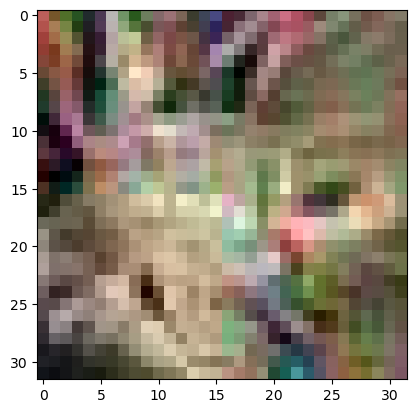

In [17]:
data_path = "./data/d_rand/"
with open(os.path.join(data_path, "labels.pkl"), "rb") as file:
    labels = pickle.load(file)
imgs = glob.glob(os.path.join(data_path, "img", "*.jpg"))
rand_idx = np.random.randint(low=0, high=len(imgs)-1)
img = np.array(Image.open(imgs[rand_idx]))

plt.imshow(img)
print(f"{classes[labels[rand_idx]]}")